# L1_and_L2_Regularization_|_Lasso_Ridge_Regression

Overfitting is a very common issue in the field of machine learning and L1 | L2 Regularization are some of the techniques that can be used to address the overfitting issue.

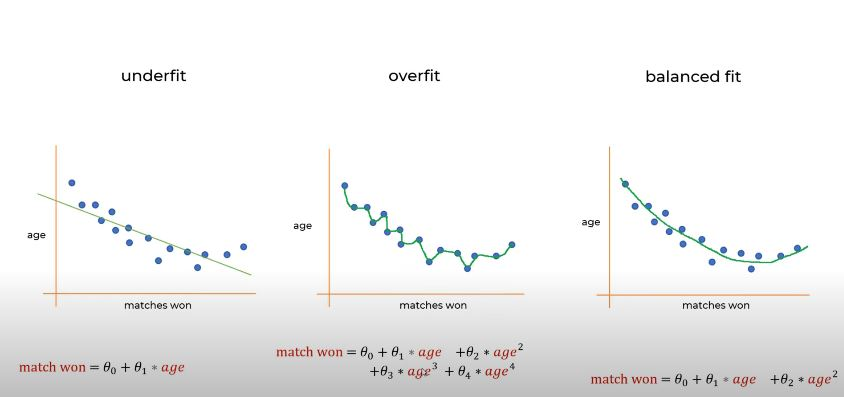

Lets assume we are trying to predict the number of matches won based on the age. Now usually when players get aged in sports, the won matches get reduced. So we can have that kind of distribution as shown in figure, where we build a model, we can create a simple, linear regression model and the equation might look like that as shown so matches won will be thetha 0 + thetha 1 into age, so thetha 0 and 1 are just constant. This is the regular linear or simple linear equation. But this green line on the left graph is not really accurately describing all the datapoints. It is trying to find the best fit interms of a straight line but all these data points are going away and then if you test data points which are lying somewhere in the empty space in upward direction on the graph then this will not be an accurate representation of the data distribution. Then we can build a distribution which is shown as 2nd graph in the image. Here we are trying to draw a line which passes through all the datapoints and in this case the equation will be higher order polynomial equation where we are trying to find out the matches won based on the age of a person but here the issue in this equation is that this equation is really complicated, the line is a zigzag type of line which is just passing through all the datapoints, and now if you have some general data points at the top here, again this is not generalizing the distribution very well. What might be better is if you have a line like this in the 3rd graph, so this is a balance between these two cases that we saw previously so we can have only thetha 2 into A square and the line will look like a curve and it can generalize the data really well so that in future if the new data point comes in this equation will make a better prediction for you.
1. The first case is called underfit
2. The second case is called overfit
3. The third case is called balanced fit

So we have now an idea of fitting, like if we try to run training too much and try to fit too much to our training dataset then we can have issues with testing dataset, when we try to predict your new data points it might not do a better prediction.

We need to keep always a balance between these 2 extreme cases like the 1st two cases.

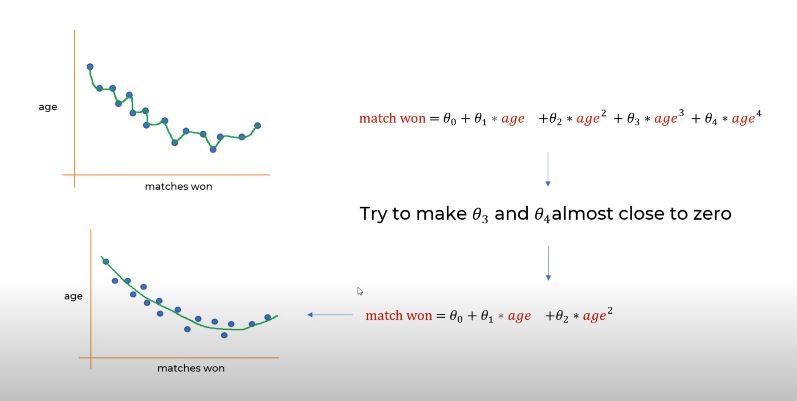

Now how do we reduce the overfitting, so here we have our overfitting line along with the equation and if in this equation we somehow make sure that the thetha 0 and 4 is almost close to 0 then we will get an equation like that as shown in figure. The idea here is to shrink the parameters which are thetha 0,3,4,1, if we can reduce this parameter or smaller then we can get a better equation for prediction.

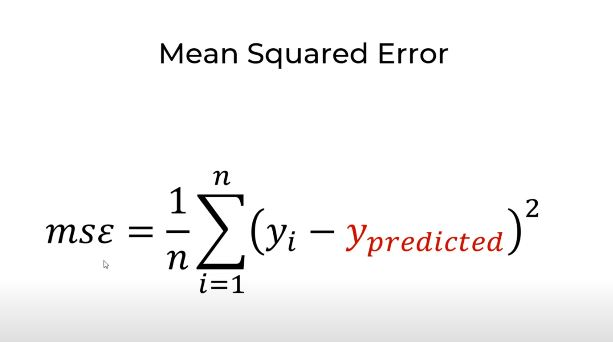

Now how do we do that. We discuss the calculation of mean square error so when we run training we pass first sample and then we calculate y predicted on some randomly initialized weights then we compare it with the truth value and then this as shown in figure is how we call calculate nean square error or MSE.

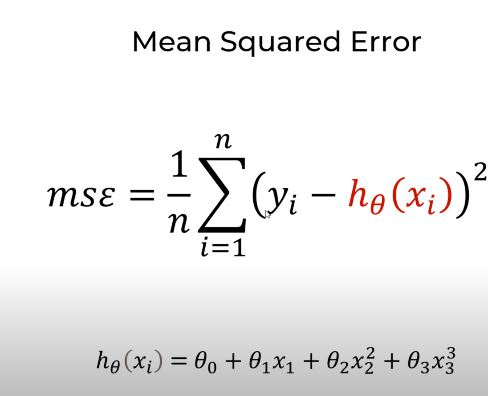

Here y predicted is actually H thetha xi where s thetha xi could be high order polynomial equation like that as shown and x1 x2 is a feature, so in our case it will be age of a person, if we are assuming about housing price prediction it will be the size of the house.

Lets assume in MSE function that is use in training and we want to minimize the value of this error on each iteration.

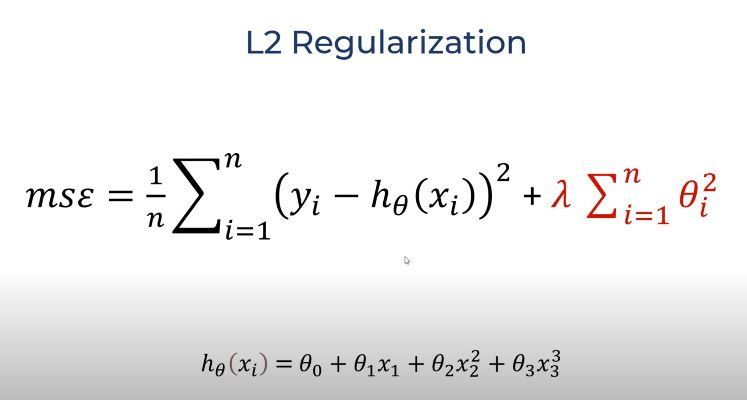

So in this equation what if we add that red color particular parameter, so what is this? there is a lambda which is a free parameter you can control which is like a tuning knob and making a square of each of these thetha parameters, so now if the thetha gets bigger that value will also get bigger and similarly the error will also be big and the model will not converge.

So essentially what we are doing is that we are penalizing higher values of thetha here so whenever model tries to make the thetha values higher then you are adding a penalty here. So by adding this penalty you are making sure that your thetha value doesnt go so high so they will remain very small and we can fine tune a model using this paramter lambda and if we make it bigger the thetha value will even get smaller and smaller and if we get this smaller and smaller than thetha value can be bigger so this is called L2 regularization and it is called L2 because we are using a square and in L1 regularization we are using the absolute value as shown:

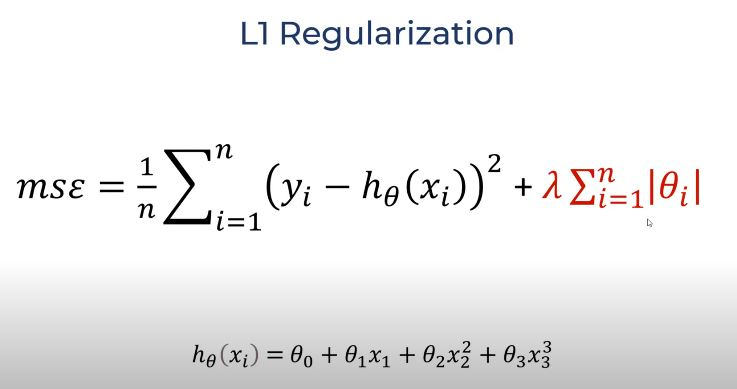

So that is the only difference between L1 and L2 i-e in L1 we are using an absolute value of thetha parameter and here again if thetha is bigger then the error will be bigger and it kind of acts as a penalty so that during a training overall value of thetha  will remain smaller.

Again going back to this equation:

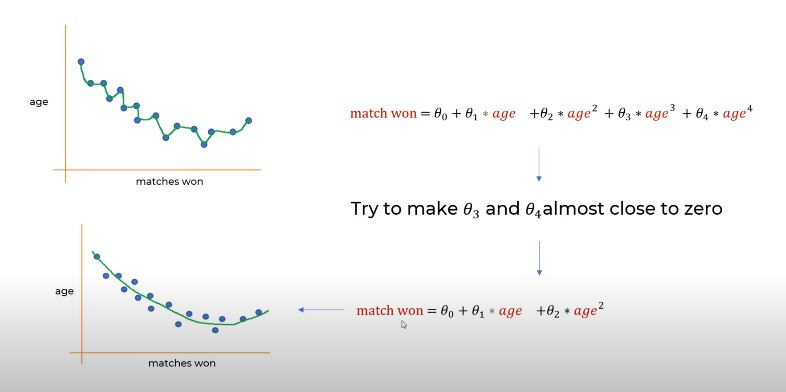

When these values remains smaller then we come up with a simpler equation and we dont make it really complicated and simpler equations are best to represent the generic case of predictions

# Coding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# suppress warning for clean notebooks
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read dataset
dataset = pd.read_csv('16_Melbourne_housing_FULL.csv')
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
# data exploration

In [5]:
dataset.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [6]:
dataset.shape

(34857, 21)

In [7]:
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount', 
               'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
dataset = dataset[cols_to_use]
dataset.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [8]:
dataset.shape

(34857, 15)

In [9]:
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

# handling NA values

In [10]:
# Some feature's missing values can be treated as zero (another class for NA values or absence of that feature)
# like 0 for Propertycount, Bedroom2 will refer to other class of NA values
# like 0 for Car feature will mean that there's no car parking feature with house
col_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']

dataset[col_to_fill_zero] = dataset[col_to_fill_zero].fillna(0)

# other continuous features can be imputed with mean for faster results since our focus is on Reducing overfitting
# using Lasso and Ridge Regression
dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())

dataset.isna().sum()

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64

In [11]:
dataset.dropna(inplace=True)
dataset.isna().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

In [12]:
dataset.shape

(27244, 15)

# Let's one hot encode the categorical features


In [13]:
dataset = pd.get_dummies(dataset, drop_first=True)
dataset.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,False,...,False,False,False,False,False,False,False,False,True,False
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,False,...,False,False,False,False,False,False,False,False,True,False
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,False,...,False,False,False,False,False,False,False,False,True,False
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,False,...,False,False,False,False,False,False,False,False,True,False
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,False,...,False,False,False,False,False,False,False,False,True,False


In [14]:
x = dataset.drop('Price',axis=1)
y = dataset['Price']

In [19]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=2)

In [26]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [27]:
reg.score(test_X,test_y)

0.13853683161504515

In [28]:
reg.score(train_X,train_y)

0.6827792395792723

This is clearly overfitting the dataset as we can see that the model score is very very low. It was that much overfit that for training it gives a good result while for testing it doesnt give a good result.

How to address this problem. So sklearn provide Lasso regression which is L1 regularization

In [35]:
from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha=100, max_iter=200, tol=0.1)

lasso_reg.fit(train_X,train_y)

Lasso(alpha=100, max_iter=200, tol=0.1)

In [36]:
lasso_reg.score(test_X,test_y)

0.6729926977873152

In [37]:
lasso_reg.score(train_X,train_y)

0.6730716814852775

By using L1 regularization the testing model got imrpoved alot.

There is another regularization L2 which is called Ridge regression

In [38]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)

In [39]:
ridge_reg.fit(train_X,train_y)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [40]:
ridge_reg.score(test_X,test_y)

0.6670848945194958

In [41]:
ridge_reg.score(train_X,train_y)

0.6622376739684328